In [15]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_classif

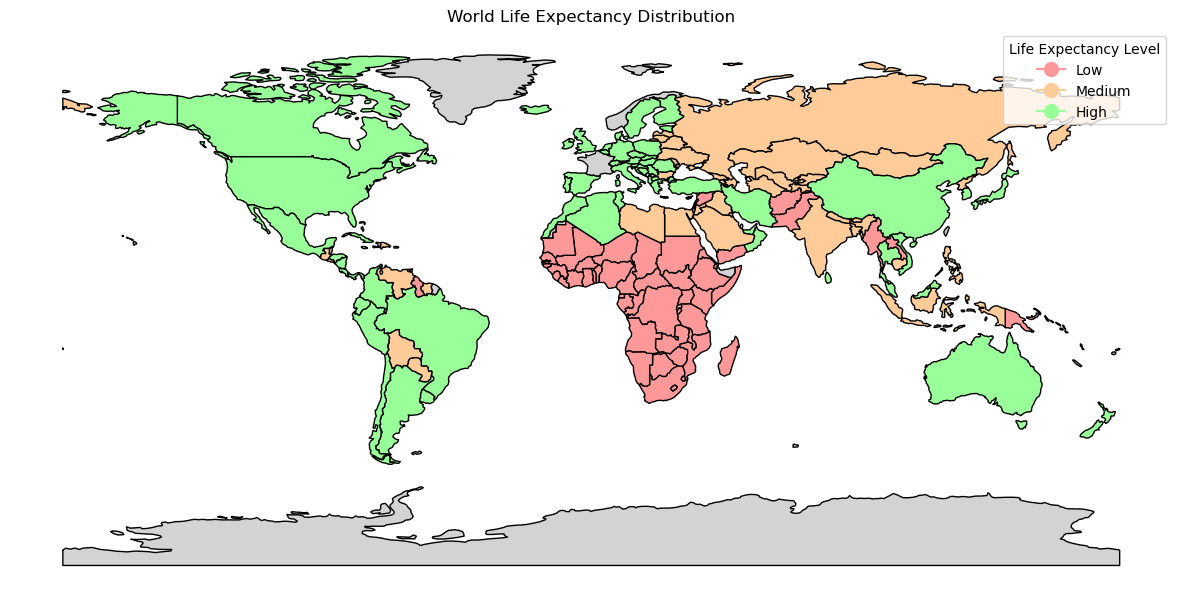

In [ ]:
#--------------------------------------------Prosessing--------------------------------------------#

# 1. Read life expectancy data
life_df = pd.read_csv('life.csv')

# 2. Get world map data
world = gpd.read_file('110m_cultural/ne_110m_admin_0_countries.shp')

# Rename 'ISO_A3' to match
world = world.rename(columns={'ISO_A3': 'CountryCode'})

# 3. Data Merge
merged = world.merge(life_df, on='CountryCode', how='left')

# 4. Mapping
# Defining a Color Map
life_levels = ['Low', 'Medium', 'High']
colors = ['#ff9999', '#ffcc99', '#99ff99']
color_map = dict(zip(life_levels, colors))

# Assign colors to each level, handle NaN values
merged['Color'] = merged['Life expectancy at birth (years)'].map(color_map)
merged['Color'] = merged['Color'].fillna('#d3d3d3')  # 使用灰色填充NaN值

# Mapping
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(ax=ax, color=merged['Color'], edgecolor='black')

# Add legends
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color=color, label=level, markersize=10)
                   for level, color in color_map.items()]
ax.legend(handles=legend_elements, title='Life Expectancy Level')

# Set Title
ax.set_title('World Life Expectancy Distribution')

# Remove the coordinate axis
ax.axis('off')

plt.show()

In [61]:
world_df = pd.read_csv('world.csv')
life_df = pd.read_csv('life.csv')

world_df['Year'] = world_df['Year'].astype(str)
life_df['Year'] = life_df['Year'].astype(str)
#Merge two datasets 
merged_df=pd.merge(world_df, life_df, on=['CountryName','CountryCode','Year'])  
merged_df.sort_values(by=['CountryName'], inplace=True)
merged_df.dropna(subset=['CountryName'],inplace=True)

X=merged_df.drop(columns=['CountryName','CountryCode','Year','Life expectancy at birth (years)'])
y=merged_df['Life expectancy at birth (years)']
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200)  
#impute missing values
X_train=X_train.replace('..',np.nan)
X_test=X_test.replace('..',np.nan)  
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
#scale features
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [62]:
#--------------------------------------------Task A--------------------------------------------#

#training of K-NN 
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_3.fit(X_train_scaled, y_train)
knn_7.fit(X_train_scaled, y_train)
#training of Decision Tree
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(X_train_scaled, y_train)
#test the classifiers
y_pred_knn_3 = knn_3.predict(X_test_scaled)
y_pred_knn_7 = knn_7.predict(X_test_scaled)
y_pred_dt = dt.predict(X_test_scaled)

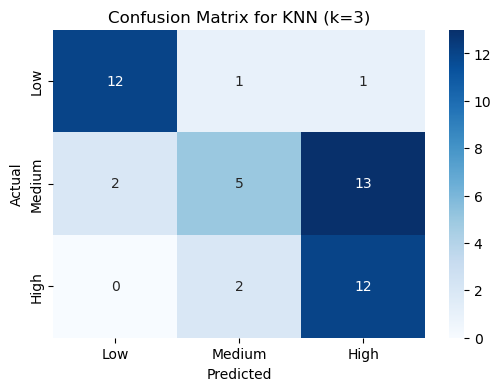

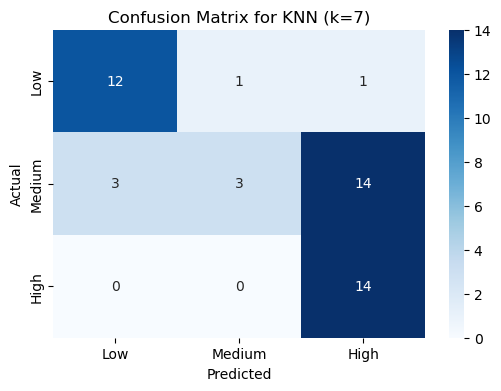

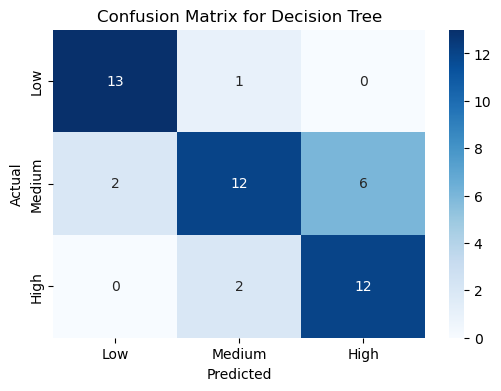

The accuracy of k-NN (k=3):0.6041666666666666
The accuracy of k-NN (k=7):0.6041666666666666
The accuracy of Decision Tree:0.7708333333333334


In [63]:

# calculate confusion matrix
conf_matrix_knn_3 = confusion_matrix(y_test, y_pred_knn_3, labels=['Low', 'Medium', 'High'])
conf_matrix_knn_7 = confusion_matrix(y_test, y_pred_knn_7, labels=['Low', 'Medium', 'High'])
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt, labels=['Low', 'Medium', 'High'])
# draw confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix,annot=True,cmap='Blues',xticklabels=['Low','Medium','High'],yticklabels=['Low','Medium','High'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()
plot_confusion_matrix(conf_matrix_knn_3, 'Confusion Matrix for KNN (k=3)')
plot_confusion_matrix(conf_matrix_knn_7, 'Confusion Matrix for KNN (k=7)')
plot_confusion_matrix(conf_matrix_dt, 'Confusion Matrix for Decision Tree')
#calculate the accuracies
accuracy_knn_3 = accuracy_score(y_test, y_pred_knn_3)
accuracy_knn_7 = accuracy_score(y_test, y_pred_knn_7)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'The accuracy of k-NN (k=3):{accuracy_knn_3}')
print(f'The accuracy of k-NN (k=7):{accuracy_knn_7}')
print(f'The accuracy of Decision Tree:{accuracy_dt}')

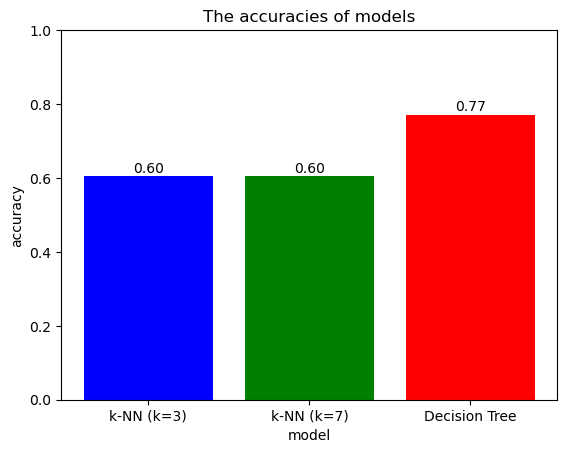

In [ ]:
# Accuracy results
accuracies = [accuracy_knn_3, accuracy_knn_7, accuracy_dt]
# Model Name
models = ['k-NN (k=3)', 'k-NN (k=7)', 'Decision Tree']

# Draw a bar chart
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('model')
plt.ylabel('accuracy')
plt.title('The accuracies of models')
plt.ylim(0, 1)  # Set the range of the y-axis, the accuracy is between 0 and 1
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center')  # Display accuracy values ​​on each bar

plt.show()

我们可以从Task B中的 PCA 2维图中看出Medium和另外两部分有较大重叠，这也说明了k-nn模型中Medium的准确率普遍较低的原因。

KNN (k=1) Accuracy: 0.6250
KNN (k=3) Accuracy: 0.6042
KNN (k=5) Accuracy: 0.6042
KNN (k=7) Accuracy: 0.6042
KNN (k=9) Accuracy: 0.6042
KNN (k=11) Accuracy: 0.6250
KNN (k=13) Accuracy: 0.6250
KNN (k=15) Accuracy: 0.6250


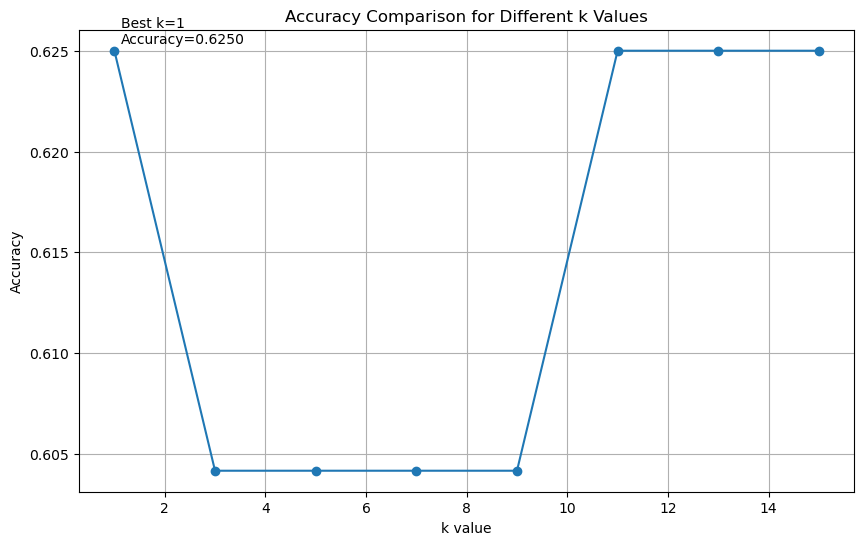


最佳k值为: 1
最佳准确率: 0.6250


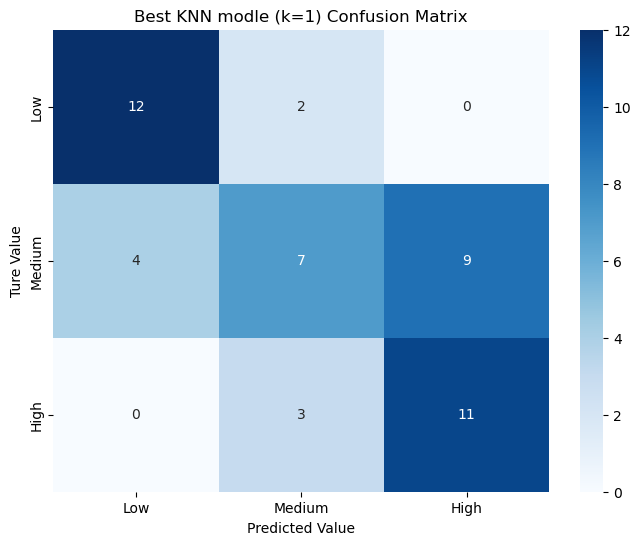

In [65]:
def train_multiple_knn(X_train, X_test, y_train, y_test, k_values):
    """
    Train multiple KNN models with different k values and evaluate their performance
    
    Parameters:
    X_train: training features
    X_test: test features
    y_train: training labels
    y_test: test labels
    k_values: list of k values
    
    Returns:
    accuracies: dictionary of accuracies for each k value
    models: dictionary of trained models
    """
    accuracies = {}
    models = {}
    
    for k in k_values:
        # Create and train model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        
        # Predict and calculate accuracy
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store results
        accuracies[k] = accuracy
        models[k] = knn
        
        # Print accuracy for each model
        print(f'KNN (k={k}) Accuracy: {accuracy:.4f}')
    
    # Visualize accuracies for different k values
    plt.figure(figsize=(10, 6))
    plt.plot(list(accuracies.keys()), list(accuracies.values()), 'o-')
    plt.xlabel('k value')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Comparison for Different k Values')
    plt.grid(True)
    
    # Add best k annotation
    best_k = max(accuracies, key=accuracies.get)
    best_acc = accuracies[best_k]
    plt.annotate(f'Best k={best_k}\nAccuracy={best_acc:.4f}',
                xy=(best_k, best_acc),
                xytext=(5, 5),
                textcoords='offset points')
    
    plt.show()
    
    return accuracies, models

# 使用示例：
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
accuracies, models = train_multiple_knn(X_train_scaled, 
                                      X_test_scaled, 
                                      y_train, 
                                      y_test, 
                                      k_values)

# 找出最佳k值
best_k = max(accuracies, key=accuracies.get)
print(f'\n最佳k值为: {best_k}')
print(f'最佳准确率: {accuracies[best_k]:.4f}')

# 绘制最佳模型的混淆矩阵
best_model = models[best_k]
y_pred_best = best_model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred_best, labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
            annot=True, 
            cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted Value')
plt.ylabel('Ture Value')
plt.title(f'Best KNN modle (k={best_k}) Confusion Matrix')
plt.show()

In [ ]:
## Define parameter grid
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
# Create a GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=100), 
                              param_grid=param_grid_rf, 
                              cv=3, verbose=1, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)
# Best parameters and best score
print("Random Forest-Best Parameters:",grid_search_rf.best_params_)
print("Random Forest-Best cross-validation score:{:.2f}".format(grid_search_rf.best_score_))
# Evaluate on the test set
best_rf = grid_search_rf.best_estimator_
final_predictions_rf = best_rf.predict(X_test_scaled)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, final_predictions_rf))

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
#Defining the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
#Get the best model
xgb_model = XGBClassifier(eval_metric='mlogloss')
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train_encoded)
#Output the best parameters and accuracy
print(f'Best Parameters:{grid_search.best_params_}')
print(f'Best Accuracy:{grid_search.best_score_}')
#Train the best model
best_xgb=grid_search.best_estimator_
best_xgb.fit(X_train_scaled, y_train_encoded)
#Predict the test set
y_pred_xgb = best_xgb.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
print(f'Tuned XGBoost Accuracy:{accuracy_xgb}')

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Random Forest-Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest-Best cross-validation score:0.76
Tuned Random Forest Accuracy: 0.7291666666666666
Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters:{'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6}
Best Accuracy:0.755005005005005
Tuned XGBoost Accuracy:0.75


投票分类器 (VotingClassifier) 🗳️

1.工作原理：

组合多个基础分类器

每个分类器独立预测

通过投票方式得出最终结果

2.投票方式：

hard：多数表决

soft：加权概率平均

投票分类器的准确率:0.7888888888888889


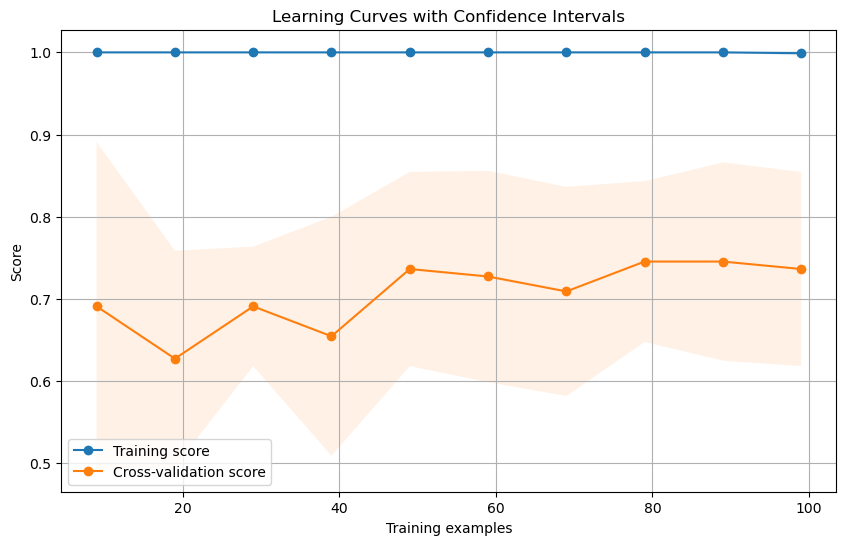

In [9]:
# 创建基分类器
clf1 = RandomForestClassifier(max_depth=4) 
clf2 = GradientBoostingClassifier(max_depth=3)
clf3 = SVC(probability=True)

clf1.fit(X_train_scaled, y_train)
clf2.fit(X_train_scaled, y_train)
clf3.fit(X_train_scaled, y_train)
# 投票分类器
voting_clf = VotingClassifier(
    estimators=[('rf', clf1), ('gb', clf2), ('svc', clf3)],
    voting='soft'
)

# 堆叠集成
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier())
]
stacking = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

# k折交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(voting_clf, X_test_scaled, y_test, cv=kf)
print(f'投票分类器的准确率:{scores.mean()}')

# 2. 使用更严格的交叉验证
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 3. 绘制更详细的学习曲线
def plot_detailed_learning_curve(estimator, X, y):
    train_sizes = np.linspace(0.1, 1.0, 10)  # 更多的数据点
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, 
        cv=skf,
        n_jobs=-1,
        train_sizes=train_sizes,
        scoring='accuracy'
    )
    
    plt.figure(figsize=(10,6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
    plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', label="Cross-validation score")
    plt.fill_between(train_sizes, 
                     np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                     np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), 
                     alpha=0.1)
    plt.fill_between(train_sizes, 
                     np.mean(val_scores, axis=1) - np.std(val_scores, axis=1),
                     np.mean(val_scores, axis=1) + np.std(val_scores, axis=1), 
                     alpha=0.1)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.title("Learning Curves with Confidence Intervals")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

plot_detailed_learning_curve(voting_clf, X_train_scaled, y_train)

1.Training Score 训练分数 

代表模型在训练数据上的表现

反映模型对已知数据的拟合程度

如果训练分数很高但交叉验证分数较低，说明模型可能过拟合


2.Cross-validation Score 交叉验证分数 🔄

代表模型在验证数据上的表现

反映模型的泛化能力

更能说明模型在实际应用中的预期表现


3.两者关系分析 🔍
常见的几种情况：

理想情况：
两条曲线接近；
分数都较高；
表明模型既拟合得好，又有良好的泛化能力；

过拟合情况：
Training score 很高；
Cross-validation score 明显较低；
表明模型过度记忆了训练数据；

欠拟合情况：
两个分数都较低；
两条曲线比较接近；
表明模型能力不足

C:\Users\l'zh\AppData\Local\Temp\ipykernel_11704\2013953188.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


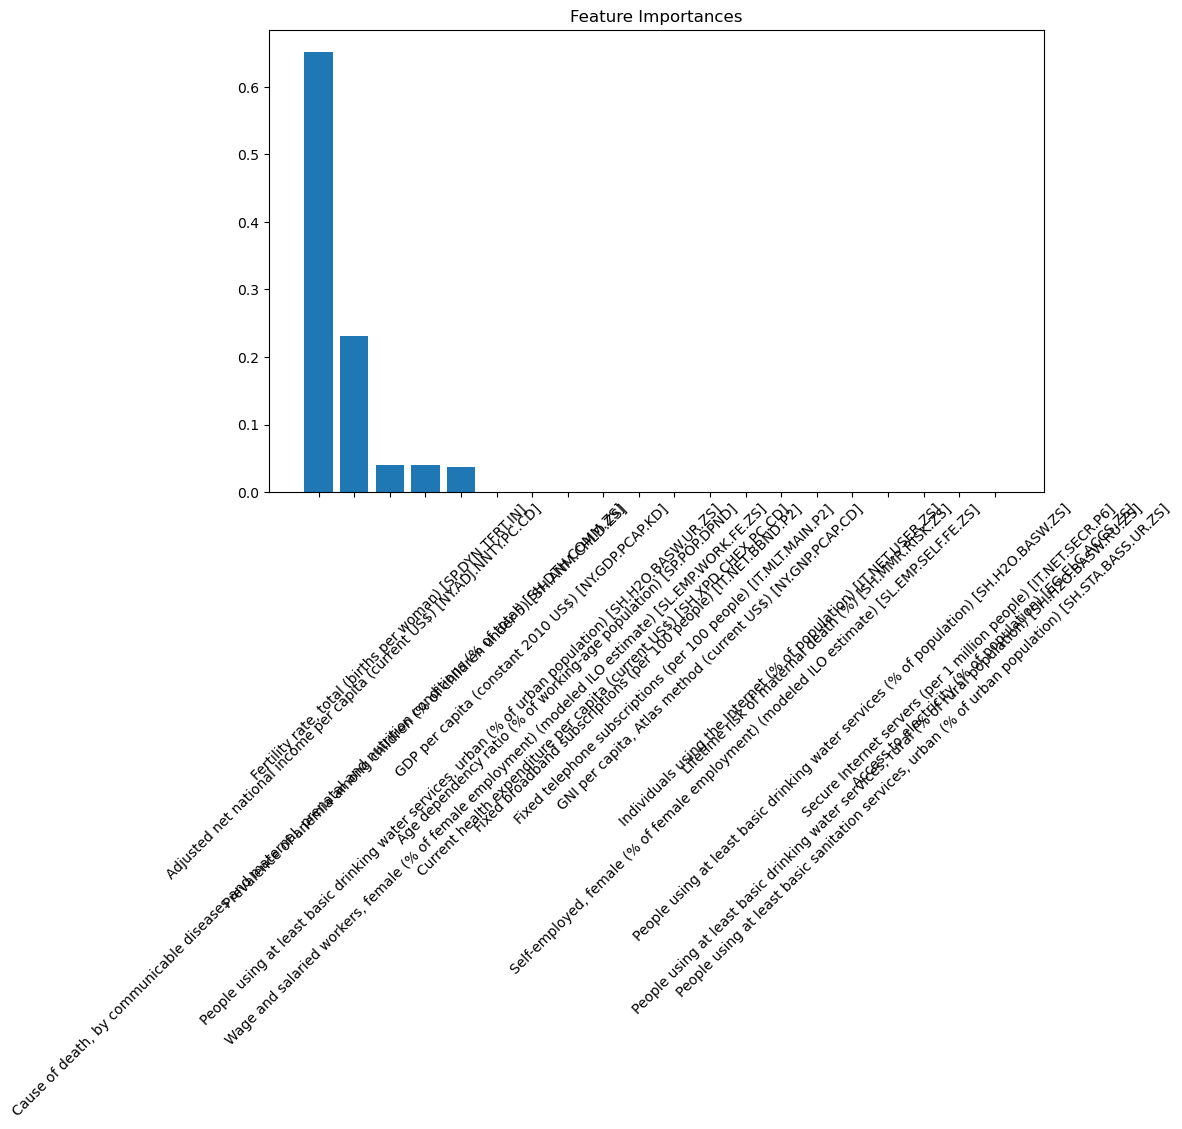

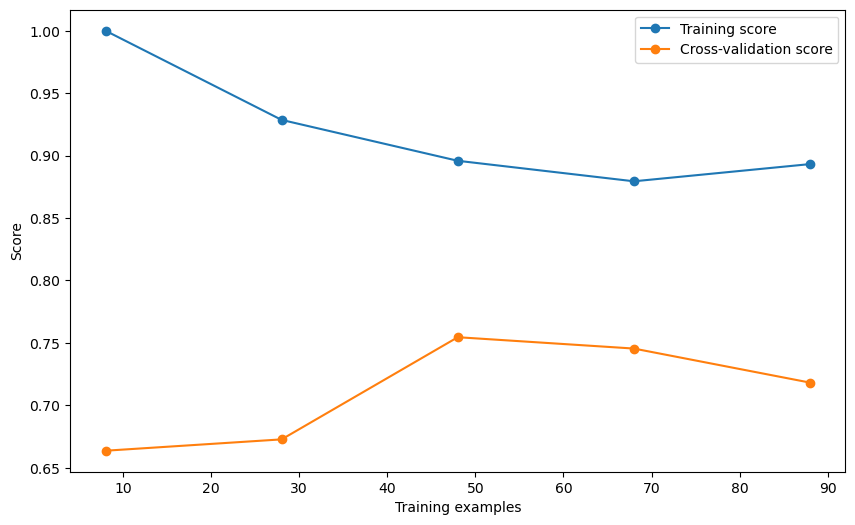

C:\Users\l'zh\AppData\Local\Temp\ipykernel_11704\2013953188.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


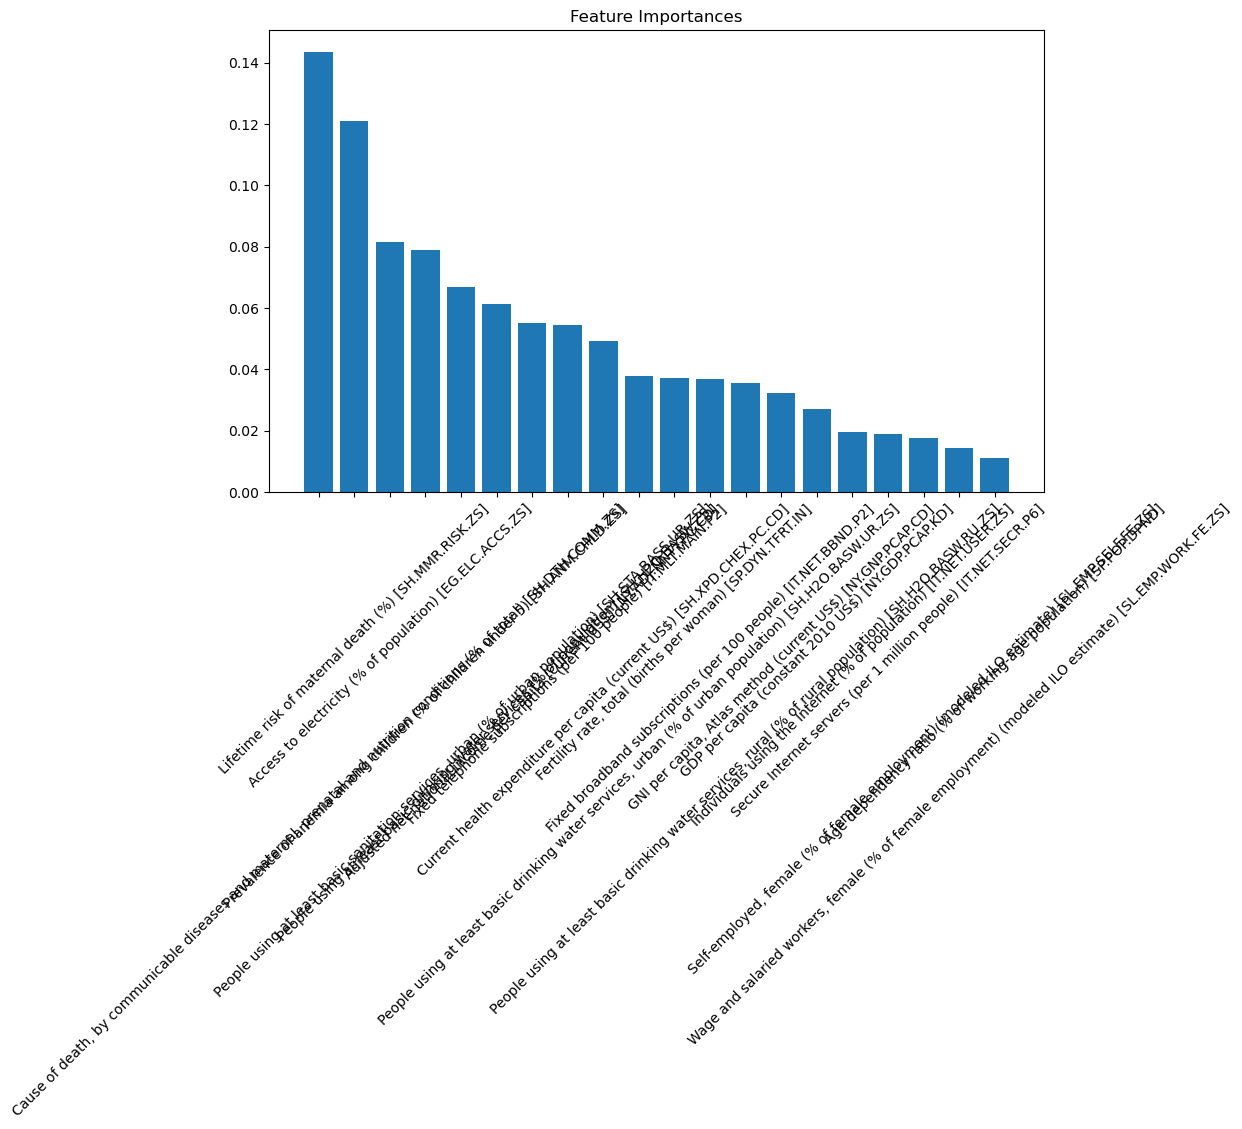

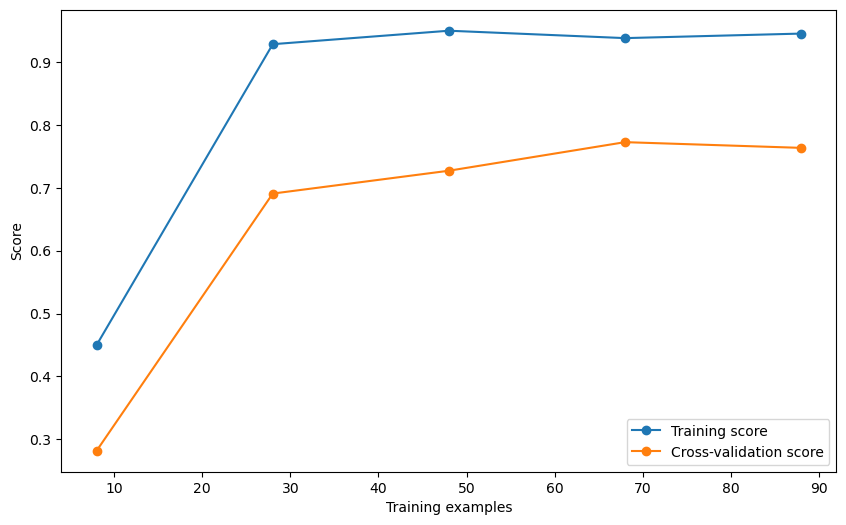

In [10]:
# 特征重要性可视化
def plot_feature_importance(model, features):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(10,6))
    plt.title("Feature Importances")
    plt.bar(range(X.shape[1]), importances[indices])
    plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
    plt.tight_layout()
    plt.show()

# 学习曲线
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(.1, 1.0, 5))
    
    plt.figure(figsize=(10,6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
    plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.show()

# 进行可视化
plot_feature_importance(dt, X.columns) #决策树的特征重要性
plot_learning_curve(dt, X_train_scaled, y_train) #决策树的学习曲线
plot_feature_importance(best_rf, X.columns) #随机森林的特征重要性
plot_learning_curve(best_rf, X_train_scaled, y_train) #随机森林的学习曲线

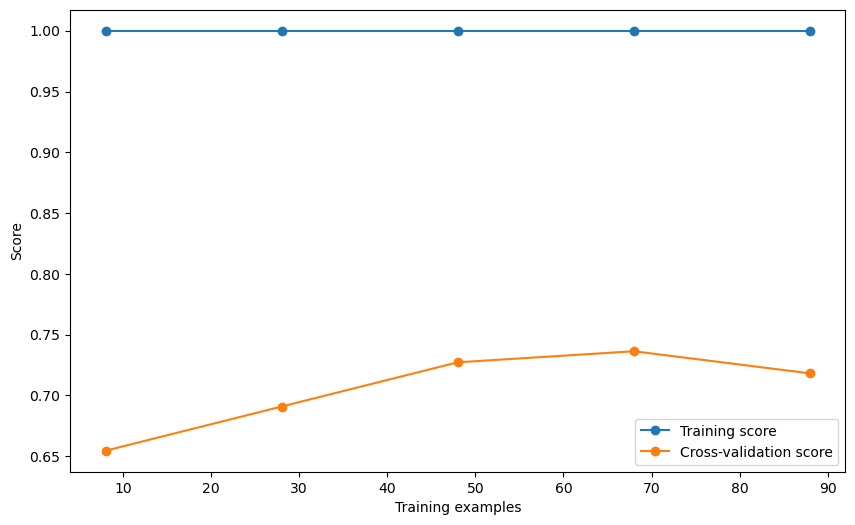

In [30]:
plot_learning_curve(voting_clf, X_train_scaled, y_train) #投票分类器的学习曲线

In [23]:
#--------------------------------------------Task B--------------------------------------------#

#20 original features
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)
# Generate 190 interaction term features
def generate_interaction_terms(df):
    # 创建一个空字典来存储所有交互项
    interactions = {}
    
    for i in range(df.shape[1]):
        for j in range(i+1, df.shape[1]):
            col_name = f'interaction_{i}_{j}'
            interactions[col_name] = df.iloc[:, i] * df.iloc[:, j]
    
    # 一次性创建DataFrame，而不是逐列添加
    return pd.DataFrame(interactions, index=df.index)

interaction_terms = generate_interaction_terms(pd.DataFrame(X_train_scaled))
interaction_terms_test = generate_interaction_terms(pd.DataFrame(X_test_scaled))
#Generate 1 feature by kmeans clustering
kmeans = KMeans(n_clusters=3, random_state=200)  
cluster_labels_train = kmeans.fit_predict(X_train_scaled)
cluster_labels_test=kmeans.predict(X_test_scaled)
cluster_labels_train=pd.DataFrame(cluster_labels_train,columns=['cluster_label'])
cluster_labels_test=pd.DataFrame(cluster_labels_test,columns=['cluster_label'])
#merge 211 features to extend the training and test set
X_train_extended=pd.concat([X_train_scaled_df,interaction_terms,cluster_labels_train],axis=1)
X_test_extended=pd.concat([X_test_scaled_df,interaction_terms_test,cluster_labels_test],axis=1)

d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
#select 4 features by SelectKBest
selector = SelectKBest(f_classif, k=4)
X_train_select4best = selector.fit_transform(X_train_extended, y_train)
X_test_select4best = selector.transform(X_test_extended)
knn_3_select4best = KNeighborsClassifier(n_neighbors=3)
knn_3_select4best.fit(X_train_select4best, y_train)
y_pred_knn_3_select4best = knn_3_select4best.predict(X_test_select4best)
accuracy_knn_3_select4best = accuracy_score(y_test, y_pred_knn_3_select4best)
print(f'The accuracy of selecting 4 features by SelectKBest:{accuracy_knn_3_select4best}')

#select via PCA by taking the first four principal components.
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_extended)
X_test_pca = pca.transform(X_test_extended)
knn_3_pca = KNeighborsClassifier(n_neighbors=3)
knn_3_pca.fit(X_train_pca, y_train)
y_pred_knn_3_pca = knn_3_pca.predict(X_test_pca)
accuracy_knn_3_pca = accuracy_score(y_test, y_pred_knn_3_pca)
print(f'The accuracy of selecting via PCA:{accuracy_knn_3_pca}')

#Take the first four features from the original dataset
X_train_top4 = X_train_scaled_df.iloc[:, :4]
X_test_top4 = X_test_scaled_df.iloc[:, :4]
knn_3_top4 = KNeighborsClassifier(n_neighbors=3)
knn_3_top4.fit(X_train_top4, y_train)
y_pred_knn_3_top4 = knn_3_top4.predict(X_test_top4)
accuracy_knn_3_top4 = accuracy_score(y_test, y_pred_knn_3_top4)
print(f'The accuracy of first four features from original dataset:{accuracy_knn_3_top4}')

#Next is Decision Tree
dt_select4best = DecisionTreeClassifier(max_depth=4)
dt_select4best.fit(X_train_select4best, y_train)
y_pred_dt_select4best = dt_select4best.predict(X_test_select4best)
accuracy_dt_select4best = accuracy_score(y_test, y_pred_dt_select4best)
print(f'The accuracy of Decision Tree selecting 4 features by SelectKBest:{accuracy_dt_select4best}')

dt_pca = DecisionTreeClassifier(max_depth=4)
dt_pca.fit(X_train_pca, y_train)
y_pred_dt_pca = dt_pca.predict(X_test_pca)
accuracy_dt_pca = accuracy_score(y_test, y_pred_dt_pca)
print(f'The accuracy of Decision Tree selecting via PCA:{accuracy_dt_pca}')

dt_top4 = DecisionTreeClassifier(max_depth=4)
dt_top4.fit(X_train_top4, y_train)
y_pred_dt_top4 = dt_top4.predict(X_test_top4)
accuracy_dt_top4 = accuracy_score(y_test, y_pred_dt_top4)
print(f'The accuracy of Decision Tree first four features from original dataset:{accuracy_dt_top4}')


The accuracy of selecting 4 features by SelectKBest:0.7083333333333334
The accuracy of selecting via PCA:0.5416666666666666
The accuracy of first four features from original dataset:0.6041666666666666
The accuracy of SelectKBest and PCA:0.6041666666666666
The accuracy of Decision Tree selecting 4 features by SelectKBest:0.7291666666666666
The accuracy of Decision Tree selecting via PCA:0.6666666666666666
The accuracy of Decision Tree first four features from original dataset:0.625
The accuracy of Decision Tree SelectKBest and PCA:0.6458333333333334


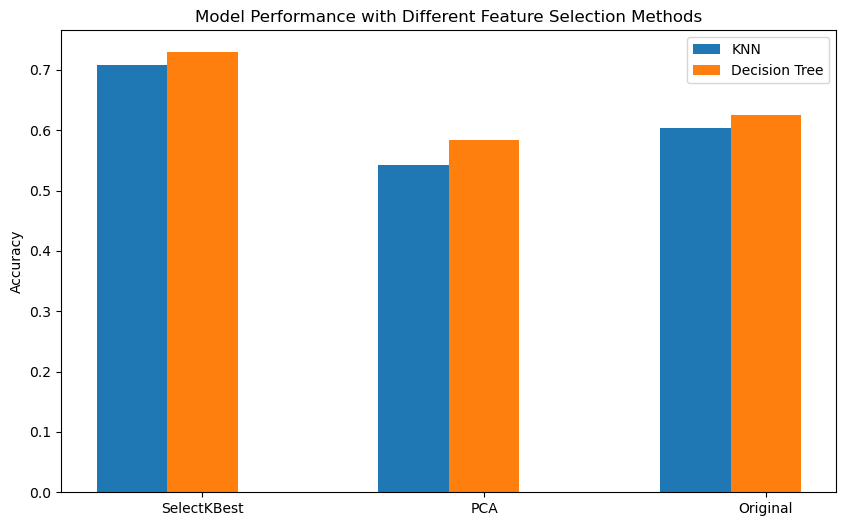

In [46]:
methods = ['SelectKBest', 'PCA', 'Original']
x = np.arange(len(methods))
width = 0.25

knn_accuracy = [accuracy_knn_3_select4best, accuracy_knn_3_pca, accuracy_knn_3_top4]
dt_accuracy = [accuracy_dt_select4best, accuracy_dt_pca, accuracy_dt_top4]

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width, knn_accuracy, width, label='KNN')
rects2 = ax.bar(x, dt_accuracy, width, label='Decision Tree') 

ax.set_ylabel('Accuracy')
ax.set_title('Model Performance with Different Feature Selection Methods')
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend()

plt.show()

好的PCA降维效果应该表现为：

高方差解释率（两个主成分解释的总方差比例高）;
清晰的类别分离（不同颜色的点有明显的边界）;
聚类结果与真实标签高度吻合;
较少的类别重叠区域;


PCA Explained Variance Ratio:
PC1: 68.70%
PC2: 15.00%
Total: 83.69%


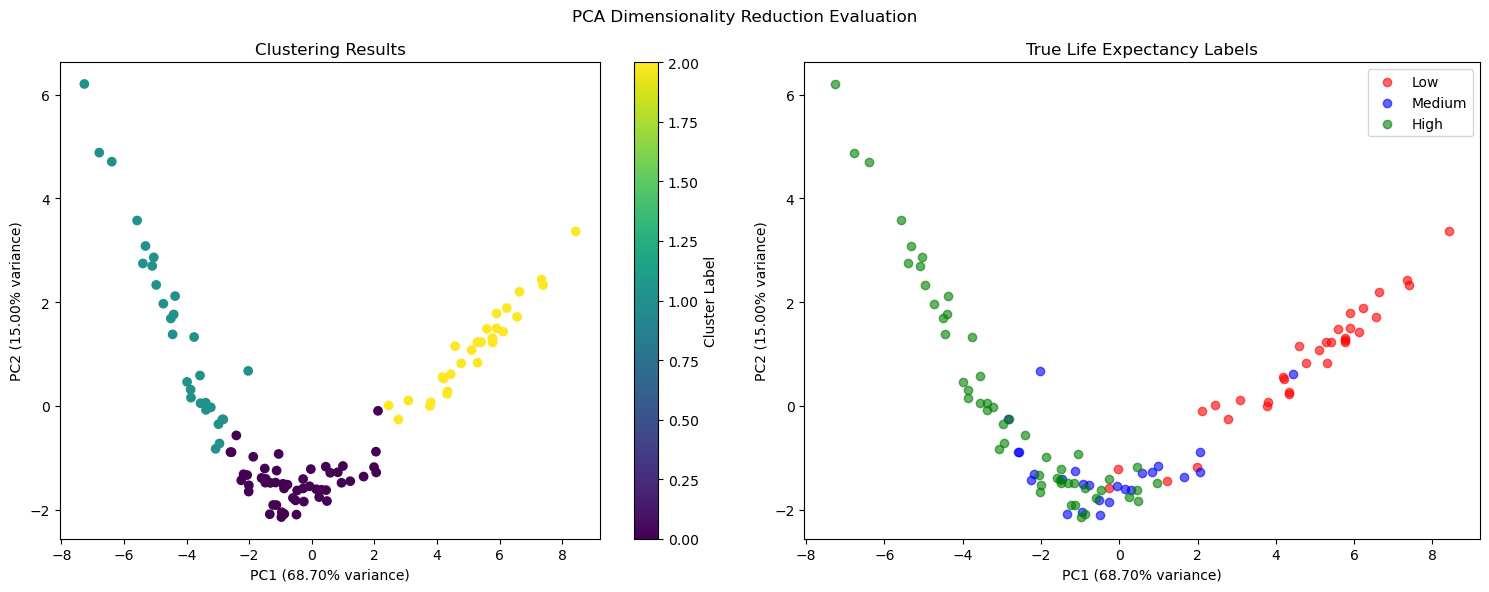

In [66]:
def visualize_clustering_evaluation(X_train_scaled, cluster_labels, y_train, title):
    # 使用PCA降维到2维
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_train_scaled)
    
    # 创建图形
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 1. 展示聚类结果
    scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], 
                          c=cluster_labels, 
                          cmap='viridis')
    ax1.set_title('Clustering Results')
    ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    plt.colorbar(scatter1, ax=ax1, label='Cluster Label')
    
    # 2. 展示真实标签
    for label, color in zip(['Low', 'Medium', 'High'], ['red', 'blue', 'green']):
        mask = y_train == label
        ax2.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                   c=color, label=label, alpha=0.6)
    
    ax2.set_title('True Life Expectancy Labels')
    ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    ax2.legend()
    
    plt.suptitle(title)
    plt.tight_layout()
    
    # 打印PCA解释的方差比例
    print("\nPCA Explained Variance Ratio:")
    print(f"PC1: {pca.explained_variance_ratio_[0]:.2%}")
    print(f"PC2: {pca.explained_variance_ratio_[1]:.2%}")
    print(f"Total: {sum(pca.explained_variance_ratio_[:2]):.2%}")
    
    plt.show()

visualize_clustering_evaluation(X_train_scaled, cluster_labels_train.values.ravel(), y_train, 'PCA Dimensionality Reduction Evaluation')

各主成分解释的方差比例: [0.43856659 0.30409449 0.04120599 0.03340021]
累积方差解释比例: [0.43856659 0.74266108 0.78386707 0.81726727]


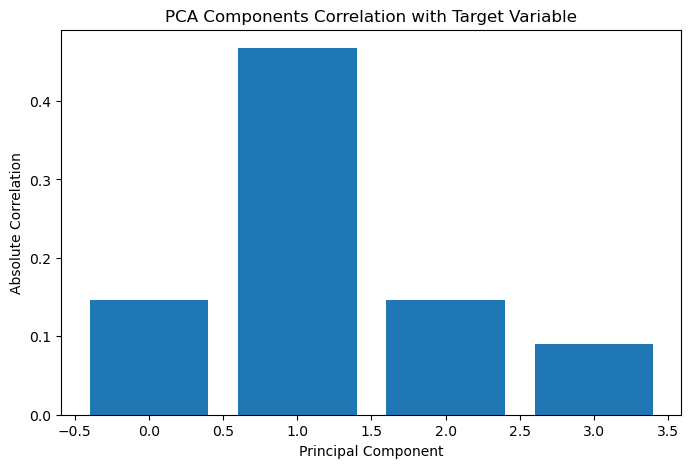

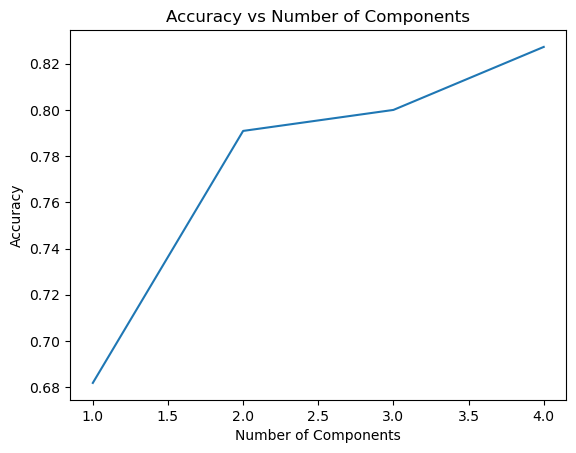

In [ ]:
# 分析PCA的方差解释率
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_extended)
print("各主成分解释的方差比例:", pca.explained_variance_ratio_)
print("累积方差解释比例:", np.cumsum(pca.explained_variance_ratio_))

# 查看PCA转换后的特征与原始标签的相关性
def analyze_pca_components(X_pca, y, n_components=4):
    correlations = []
    for i in range(n_components):
        correlation = np.corrcoef(X_pca[:, i], pd.get_dummies(y).values[:, 0])[0,1]
        correlations.append(abs(correlation))
    
    plt.figure(figsize=(8, 5))
    plt.bar(range(n_components), correlations)
    plt.title('PCA Components Correlation with Target Variable')
    plt.xlabel('Principal Component')
    plt.ylabel('Absolute Correlation')
    plt.show()

# 分析各主成分对分类的贡献
def analyze_component_importance(pca, X_train_pca, y_train):
    accuracies = []
    for i in range(1, pca.n_components_ + 1):
        clf = KNeighborsClassifier(n_neighbors=3)
        clf.fit(X_train_pca[:, :i], y_train)
        score = clf.score(X_train_pca[:, :i], y_train)
        accuracies.append(score)
    
    plt.plot(range(1, pca.n_components_ + 1), accuracies)
    plt.xlabel('Number of Components')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Number of Components')
    plt.show()

analyze_pca_components(X_train_pca, y_train, n_components=4)
analyze_component_importance(pca, X_train_pca, y_train)

PCA降维效果好，解释率高，但主成分相关性普遍很低（1个0.4左右，另外三个0.1左右），所以PCA降维的准确率不高。